In [4]:
import requests
import pandas as pd

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()  # подтянет переменные из .env, если файл есть рядом

API_KEY = os.getenv("API_KEY")
assert API_KEY, "Переменная окружения API_KEY не задана"

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()  # подтянет переменные из .env, если файл есть рядом

API_KEY = os.getenv("API_KEY")
assert API_KEY, "Переменная окружения API_KEY не задана"

In [7]:
headers = {
    'Authorization': f'Bearer {API_KEY}'
}

In [8]:
# URL для получения списка категорий событий
url = 'https://api.timepad.ru/v1/dictionary/event_categories'

# Делаем запрос к API
response = requests.get(url, headers=headers)

# Проверяем статус ответа
if response.status_code == 200:
    # Декодируем JSON ответ
    categories = response.json()
    
    # Обрабатываем и выводим категории
    for category in categories.get('values', []):
        print(f"ID: {category['id']}, Name: {category['name']}")
else:
    print(f"Error: Unable to fetch event categories, status code: {response.status_code}")  

ID: 217, Name: Бизнес
ID: 374, Name: Кино
ID: 376, Name: Спорт
ID: 379, Name: Для детей
ID: 382, Name: Иностранные языки
ID: 399, Name: Красота и здоровье
ID: 452, Name: ИТ и интернет
ID: 453, Name: Психология и самопознание
ID: 456, Name: Еда
ID: 457, Name: Вечеринки
ID: 458, Name: Выставки
ID: 459, Name: Театры
ID: 460, Name: Концерты
ID: 461, Name: Экскурсии и путешествия
ID: 462, Name: Другие события
ID: 463, Name: Другие развлечения
ID: 524, Name: Хобби и творчество
ID: 525, Name: Искусство и культура
ID: 1315, Name: Образование за рубежом
ID: 1940, Name: Гражданские проекты
ID: 2335, Name: Интеллектуальные игры
ID: 2465, Name: Наука


In [11]:
headers = {
    'Authorization': f'Bearer {API_KEY}'
}

# URL для получения событий
events_url = 'https://api.timepad.ru/v1/events.json'

# Параметры запроса
params = {
    'limit': 100,  # Количество событий на одной странице
    'skip': 0,     # Смещение для пагинации
    'fields': 'name,location,ticket_types,description_short,description_html,tickets_limit,starts_at,age_limit,categories,ends_at,status,url,sold,attended,locale',  # Дополнительные поля
    'sort': '+starts_at',  # Сортировка по дате начала
    'countries': 'Russia'  # Фильтрация по стране
}

# Делаем первый запрос к API
response = requests.get(events_url, headers=headers, params=params)
response.raise_for_status()  # Проверка статуса ответа

# Декодируем JSON ответ
data = response.json()

# Получаем общее количество событий
total_events = data.get('total', 0)

print(f'Общее количество найденных событий: {total_events}')

# Сбор данных всех событий
all_events = []
all_events.extend(data.get('values', []))

# Пагинация и сбор всех событий
while len(all_events) < total_events:
    params['skip'] += params['limit']
    response = requests.get(events_url, headers=headers, params=params)
    response.raise_for_status()
    data = response.json()
    all_events.extend(data.get('values', []))

print(f'Всего загружено событий: {len(all_events)}')

# Извлечение нужных данных и преобразование их в DataFrame
events_data = []
for event in all_events:
    total_sold_tickets = 0
    total_attended = 0
    for ticket_type in event.get('ticket_types', []):
        total_sold_tickets += ticket_type.get('sold', 0)
        total_attended += ticket_type.get('attended', 0)
    event_data = {
        'Название': event.get('name'),
        'Место проведения': f"{event.get('location', {}).get('country')}, {event.get('location', {}).get('city')}, {event.get('location', {}).get('address')}",
        'Стоимость билета': ', '.join([str(ticket.get('price')) for ticket in event.get('ticket_types', [])]),
        'Краткое описание': event.get('description_short'),
        'Полное описание': event.get('description_html'),
        'Максимальное количество человек': event.get('tickets_limit'),
        'Дата проведения': event.get('starts_at'),
        'Возрастные ограничения': event.get('age_limit'),
        'Категория события': ', '.join([category.get('name', '') for category in event.get('categories', [])]),
        'Дата окончания события': event.get('ends_at'),
        'Статус события': event.get('status'),
        'Ссылка на событие': event.get('url'),
        'Количество проданных билетов': total_sold_tickets,
        'Количество посетивших людей': total_attended,
        'Ограничение на количество билетов': event.get('tickets_limit'),
        'Язык события по умолчанию': event.get('locale')
    }
    events_data.append(event_data)

# Преобразуем собранные данные в DataFrame
events_df = pd.DataFrame(events_data)
print(events_df.head())


Общее количество найденных событий: 20578


SSLError: HTTPSConnectionPool(host='api.timepad.ru', port=443): Max retries exceeded with url: /v1/events.json?limit=100&skip=100&fields=name%2Clocation%2Cticket_types%2Cdescription_short%2Cdescription_html%2Ctickets_limit%2Cstarts_at%2Cage_limit%2Ccategories%2Cends_at%2Cstatus%2Curl%2Csold%2Cattended%2Clocale&sort=%2Bstarts_at&countries=Russia (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)')))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
events = pd.read_csv('meetings.csv')

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         18037 non-null  int64 
 1   Название                           18037 non-null  object
 2   Место проведения                   18037 non-null  object
 3   Стоимость билета                   18037 non-null  object
 4   Краткое описание                   16998 non-null  object
 5   Полное описание                    17534 non-null  object
 6   Максимальное количество человек    18037 non-null  int64 
 7   Дата проведения                    18037 non-null  object
 8   Возрастные ограничения             18037 non-null  int64 
 9   Категория события                  18037 non-null  object
 10  Дата окончания события             17447 non-null  object
 11  Статус события                     18037 non-null  object
 12  Ссыл

In [ ]:
events.describe()

,Unnamed: 0,Максимальное количество человек,Возрастные ограничения,Количество проданных билетов,Количество посетивших людей,Ограничение на количество билетов
count,18037.000000,18037.000000,18037.000000,18037.0,18037.0,18037.000000
mean,9018.000000,13.313411,11.094639,0.0,0.0,13.313411
std,5206.977738,134.938340,6.625402,0.0,0.0,134.938340
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,4509.000000,0.000000,6.000000,0.0,0.0,0.000000
50%,9018.000000,0.000000,12.000000,0.0,0.0,0.000000
75%,13527.000000,7.000000,16.000000,0.0,0.0,7.000000
max,18036.000000,10000.000000,18.000000,0.0,0.0,10000.000000


In [ ]:
events.describe(include='object')

,Название,Место проведения,Стоимость билета,Краткое описание,Полное описание,Дата проведения,Категория события,Дата окончания события,Статус события,Ссылка на событие,Язык события по умолчанию
count,18037,18037,18037,16998,17534,18037,18037,17447,18037,18037,18037
unique,7653,4232,1480,6247,7036,3547,69,4165,1,18035,2
top,Стендап: Очень крутая проверка,"None, Онлайн, None",0,Фаролеро — проект на стыке туризма и event-тех...,<p>Все участники вечеринки быстрых свиданий пр...,2024-05-30T19:00:00+0300,Экскурсии и путешествия,2024-05-30T21:00:00+0300,ok,https://gorky-park.timepad.ru/event/2887636/,ru
freq,154,2828,7514,191,175,181,4525,98,18037,2,18034


In [ ]:
events.duplicated().sum()

0

In [ ]:
events = events.drop_duplicates()

# Предобработка данных

Удалим неинформативные признаки

In [ ]:
events[['Количество посетивших людей', 'Количество проданных билетов', 'Ограничение на количество билетов']].value_counts()

Количество посетивших людей  Количество проданных билетов  Ограничение на количество билетов
0                            0                             0                                    12766
                                                           20                                     958
                                                           15                                     426
                                                           10                                     346
                                                           30                                     336
                                                                                                ...  
                                                           34                                       1
                                                           255                                      1
                                                           256                             

In [ ]:
events = events.drop('Unnamed: 0', axis=1)

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Название                           18037 non-null  object
 1   Место проведения                   18037 non-null  object
 2   Стоимость билета                   18037 non-null  object
 3   Краткое описание                   16998 non-null  object
 4   Полное описание                    17534 non-null  object
 5   Максимальное количество человек    18037 non-null  int64 
 6   Дата проведения                    18037 non-null  object
 7   Возрастные ограничения             18037 non-null  int64 
 8   Категория события                  18037 non-null  object
 9   Дата окончания события             17447 non-null  object
 10  Статус события                     18037 non-null  object
 11  Ссылка на событие                  18037 non-null  object
 12  Коли

Преобразуем даты в формат datetime

In [ ]:
events['Дата окончания события'].describe()

count                        17447
unique                        4165
top       2024-05-30T21:00:00+0300
freq                            98
Name: Дата окончания события, dtype: object

In [ ]:
events['Дата проведения'] = pd.to_datetime(events['Дата проведения'], errors='coerce')
events['Дата окончания события'] = pd.to_datetime(events['Дата окончания события'], errors='coerce')

In [ ]:
events

,Название,Место проведения,Стоимость билета,Краткое описание,Полное описание,Максимальное количество человек,Дата проведения,Возрастные ограничения,Категория события,Дата окончания события,Статус события,Ссылка на событие,Количество проданных билетов,Количество посетивших людей,Ограничение на количество билетов,Язык события по умолчанию
0,Бизнес-завтрак для предпринимателей,"Россия, Самара, ул. Молодогвардейская 211",0,"Знакомство с предпринимателями, проведение &am...",<p>Приглашаем всех желающих на бизнес-завтрак ...,0,2024-05-29 09:30:00+03:00,6,Бизнес,2024-05-29 12:00:00+03:00,ok,https://treningovyy-tsentr--1e.timepad.ru/even...,0,0,0,ru
1,Семинар «Современное аналитическое оборудовани...,"Россия, Москва, ул. Обручева 34/63с2 | «Мелитэ...",0,Практическое применение. Работа с образцами.,"<p><span style=""font-size:11pt;""><span><span><...",0,2024-05-29 09:30:00+03:00,18,Наука,2024-05-30 18:00:00+03:00,ok,https://melytec.timepad.ru/event/2853760/,0,0,0,ru
2,ДОГ-ТРЕКИНГ,"Россия, Воронеж, None",1000,Дог-трекинг — необычный и крайне милый вариант...,NaN,2,2024-05-29 09:30:00+03:00,18,Экскурсии и путешествия,2024-05-29 10:30:00+03:00,ok,https://parkbk.timepad.ru/event/2896650/,0,0,2,ru
3,ОНЛАЙН музыкальная терапия. Иоганн Себастьян Бах.,"None, Онлайн, None",0,"Мы впервые будем лечиться не лекарствами, а с ...","<p><span style=""font-size:1.1875rem;""><span cl...",0,2024-05-29 09:30:00+03:00,6,"Другие развлечения, ИТ и интернет",2024-05-29 10:30:00+03:00,ok,https://svr.timepad.ru/event/2897264/,0,0,0,ru
4,РОССИЙСКИЕ ДНИ ДИЗАЙНА в Воронеже 2024,"Россия, Воронеж, площадь Детей, д. 1","0, 1000, 3000",Получи билет на Российские дни дизайна и Форум...,"<h3 class=""tsubheader"">С 29 по 31 мая 2024 год...",0,2024-05-29 10:00:00+03:00,16,Выставки,2024-05-31 17:00:00+03:00,ok,https://forumdesign.timepad.ru/event/2679331/,0,0,0,ru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18032,Марафон Стройности &quot;Пока Бока&quot; 1,"None, Онлайн, None",0,NaN,NaN,0,NaT,16,Красота и здоровье,NaT,ok,https://fitlife24.timepad.ru/event/929411/,0,0,0,ru
18033,Марафон Стройности &quot;Пока Бока&quot; 1,"Россия, Москва, None",0,NaN,NaN,0,NaT,16,Красота и здоровье,NaT,ok,https://fitlife24.timepad.ru/event/929412/,0,0,0,ru
18034,Пропуск на Ересь Хоруса,"None, Онлайн, None","10, 50, 100, 300, 500","Ересь Хоруса рано или поздно начнется, а готов...","<p>Лучшие мудрецы бэка, с использованием мощне...",0,NaT,18,Другие события,NaT,ok,https://chaosundivided.timepad.ru/event/395795/,0,0,0,ru
18035,Спектакль «НОВЫЙ ГОД»,"Россия, Санкт-Петербург, Биржевая 12","10000, 800, 10, 100, 800, 100, 10, 300, 10000,...",ПОДДЕРЖКА ПРОЕКТА ПОСТРЕАЛИЗМ,"<p style=""text-align:center;"">мы конструируем ...",0,NaT,16,Искусство и культура,NaT,ok,https://postkultura-ciniki.timepad.ru/event/12...,0,0,0,ru


In [ ]:
events['Город'] = events['Место проведения'].apply(lambda x: x.split(', ')[1])

Рассмотрим только 2024 год

In [ ]:
events_copy = events[events['Дата проведения'].dt.year == 2024]

выделим города

In [ ]:
events_copy['Место проведения'].value_counts()

Место проведения
None, Онлайн, None                                                                 2622
Россия, Москва, м. Китай-город, Хитровский переулок, 3/1с4.                         279
Россия, Валаам, Валаамский архипелаг                                                169
Россия, Москва, ул. Забелина 1, метро Китай-город                                   154
Россия, Москва, None                                                                147
                                                                                   ... 
Россия, Санкт-Петербург, Садовая ул., д. 62, лит. А — во дворе Никольских рядов       1
Россия, Волгоград, Лофт1890 ( ул. 10-й Дивизии НКВД 5а)                               1
Россия, Москва, ул. Профсоюзная, д. 42, корп. 3                                       1
Россия, Москва, Покровский б-р, 11                                                    1
Россия, Самара, ул. Молодогвардейская 211                                             1
Name: count, Le

In [ ]:
events_copy['Город'].value_counts()

Город
Москва                             8410
Санкт-Петербург                    2965
Онлайн                             2622
Казань                              309
Валаам                              307
                                   ... 
Зеленоградск                          1
Ломоносов                             1
Федеральная территория «Сириус»       1
Невинномысск                          1
Арзамас                               1
Name: count, Length: 240, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
events_copy['Категория события'].value_counts()

Категория события
Экскурсии и путешествия                        4514
Искусство и культура                           1971
Психология и самопознание                      1903
Концерты                                       1208
Бизнес                                         1143
                                               ... 
Красота и здоровье, ИТ и интернет                 1
Выставки, Психология и самопознание               1
Экскурсии и путешествия, Другие развлечения       1
Для детей, ИТ и интернет                          1
Бизнес, Другие события                            1
Name: count, Length: 68, dtype: int64

In [ ]:
events_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17753 entries, 0 to 17752
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   Название                           17753 non-null  object                   
 1   Место проведения                   17753 non-null  object                   
 2   Стоимость билета                   17753 non-null  object                   
 3   Краткое описание                   16750 non-null  object                   
 4   Полное описание                    17292 non-null  object                   
 5   Максимальное количество человек    17753 non-null  int64                    
 6   Дата проведения                    17753 non-null  datetime64[ns, UTC+03:00]
 7   Возрастные ограничения             17753 non-null  int64                    
 8   Категория события                  17753 non-null  object              

In [ ]:
data = events_copy.copy()

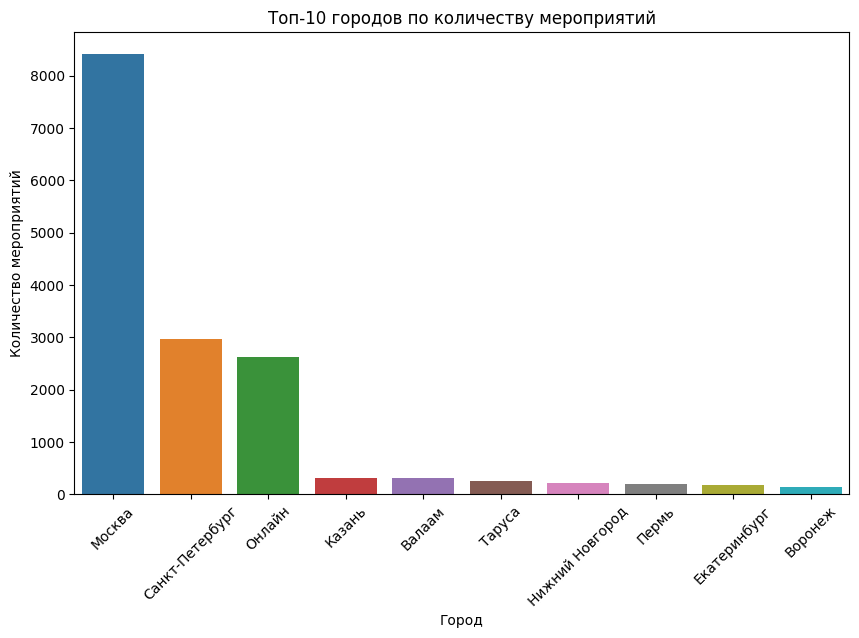

In [ ]:
# Количество мероприятий в каждом городе
city_counts = data['Город'].value_counts()

# Визуализация количества мероприятий в топ-10 городах
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10])
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.ylabel('Количество мероприятий')
plt.title('Топ-10 городов по количеству мероприятий')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None) 

In [ ]:
data['Категория события'].value_counts()

Категория события
Экскурсии и путешествия                                                         4514
Искусство и культура                                                            1971
Психология и самопознание                                                       1903
Концерты                                                                        1208
Бизнес                                                                          1143
Для детей                                                                       1033
Хобби и творчество                                                               896
Спорт                                                                            770
Другие события                                                                   651
Театры                                                                           549
Вечеринки                                                                        508
Иностранные языки                              

In [ ]:
# Функция для проверки наличия комбинированных категорий
def is_combined_category(category):
    category_list = category.split(', ')
    return len(category_list) > 1

# Удаление строк с комбинированными категориями
data = data[~data['Категория события'].apply(is_combined_category)]

# Проверка результатов
print(data['Категория события'].value_counts())

Категория события
Экскурсии и путешествия      4514
Искусство и культура         1971
Психология и самопознание    1903
Концерты                     1208
Бизнес                       1143
Для детей                    1033
Хобби и творчество            896
Спорт                         770
Другие события                651
Театры                        549
Вечеринки                     508
Иностранные языки             427
Выставки                      379
Кино                          281
Интеллектуальные игры         278
Другие развлечения            273
Красота и здоровье            236
Наука                         233
ИТ и интернет                 145
Еда                           113
Гражданские проекты            36
Образование за рубежом          7
Другое                          5
Name: count, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17559 entries, 0 to 17752
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   Название                   17559 non-null  object                   
 1   Стоимость билета           17559 non-null  object                   
 2   Краткое описание           16576 non-null  object                   
 3   Полное описание            17098 non-null  object                   
 4   Дата проведения            17559 non-null  datetime64[ns, UTC+03:00]
 5   Возрастные ограничения     17559 non-null  int64                    
 6   Категория события          17559 non-null  object                   
 7   Дата окончания события     17028 non-null  datetime64[ns, UTC+03:00]
 8   Статус события             17559 non-null  object                   
 9   Ссылка на событие          17559 non-null  object                   
 10  Язы

In [ ]:
data.duplicated().sum()

2

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.sample(1)

,Название,Стоимость билета,Краткое описание,Полное описание,Дата проведения,Возрастные ограничения,Категория события,Дата окончания события,Статус события,Ссылка на событие,Язык события по умолчанию,Город
6579,МЫ - ПЕРВЫЕ! Экскурсия в Музей космонавтики для ребят 8-13 лет,"2800, 4200, 1400, 5600",NaN,"12 апреля 1961 года – дата, знаменательная не только для России, но и для всего человечества. Именно в этот день в космос отправился первый советский и русский космонавт – Юрий Гагарин. 108 минут, за которые космический корабль «Восток» под управлением Гагарина совершил виток вокруг Земли, навсегда изменили мир. Космос, такой необъятный и неприступный, в этот день стал немного ближе. Именно тематике космоса посвящена наша экскурсия «Мы первые!» . Наша задача – увлечь ребят космосом и напомнить, что именно СССР и Россия сыграли решающую роль в освоении Вселенной. На экскурсии ребята узнают: · Об основоположнике ракетостроения ученом К.Ф.Циолковском, а также о других изобретателях и разработчиках ракет. · О первых запусках ракет – как удачных, так и неудачных. В том числе, о советском спутнике и американском «капутнике». · Их ждут интересные истории о храбрых животных – космических первопроходцах. · Будет рассказано о том, какая масштабная подготовка предшествовала полету Гагарина в космос. О том, что Гагарина выбрали из 3461 кандидата. · Мы не забудем и других советских и российских выдающихся космонавтов: Терешкову, Леонова, Титова (дублера Гагарина). Расскажем, чем они прославились и как справлялись с внештатными ситуациями во время космических полетов. · Расскажем, как строятся космические станции и каково на них жить в состоянии постоянной невесомости. · Ребята узнают о будущем освоении Солнечной системы, ближнего и дальнего космоса. О перспективах межпланетных перелетов и о том, что может ждать нас на других планетах. · И, конечно, мы расскажем о Земле – ее месте во Вселенной, бурном космическом прошлом и будущем через миллиарды лет. Продолжительность экскурсии ~1.30 Правила посещения: 1. Входные билеты в музей Космонавтики включены 2.На экскурсию допускаются дети строго от 8 лет. 3. Билеты приобретаются на каждого участника экскурсии — взрослого или ребенка. Дети без сопровождающих взрослых на экскурсию не допускаются. 4. Встречаемся за 15 минут по адресу Проспект мира, 111- https://yandex.ru/maps/-/CDblEKYa и отмечаемся у организатора, показав куар коды билетов Фотография организатора будет за 15 минут до начала экскурсии в клубе - https://t.me/+G94iypHyvksxYTAy . При опоздании на мероприятие, организатор не гарантирует возможность присоединения к группе. 6. Возвраты билетов производятся строго в соответствии с условиями и ФЗ, с которыми вы соглашаетесь при покупке билетов.",2024-06-08 12:00:00+03:00,6,Экскурсии и путешествия,2024-06-08 13:30:00+03:00,ok,https://gid-kid.timepad.ru/event/2897032/,ru,Москва


In [ ]:
import html
import re

# Функция для очистки описаний
def clean_description(text):
    if not isinstance(text, str):
        return text
    # Декодирование HTML-сущностей
    text = html.unescape(text)
    # Удаление HTML-тегов
    text = re.sub(r'<[^>]+>', '', text)
    # Замена переносов строк на пробелы
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Применение функции очистки к каждому описанию
data['Полное описание'] = data['Полное описание'].apply(clean_description)

# Проверка результата
print(data['Полное описание'][0])

Приглашаем всех желающих на бизнес-завтрак для предпринимателей. Среда 2 раза в месяц 9:30-12:00, сбор в 9:20 Молодогвардейская 211 Зал "МойБизнес63" В программе: Новые встречи в среде предпринимателей и не только Полезные знакомства Самопрезентация на 1,5 минуты своих услуг и себя Получение конструктивной обратной связи по своему выступлению Прекрасная доброжелательная обстановка Участие свободное


In [ ]:
data['Краткое описание'] = data['Краткое описание'].apply(clean_description)

In [ ]:
data['Название'] = data['Название'].apply(clean_description)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17753 entries, 0 to 17752
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   Название                           17753 non-null  object                   
 1   Место проведения                   17753 non-null  object                   
 2   Стоимость билета                   17753 non-null  object                   
 3   Краткое описание                   16750 non-null  object                   
 4   Полное описание                    17292 non-null  object                   
 5   Максимальное количество человек    17753 non-null  int64                    
 6   Дата проведения                    17753 non-null  datetime64[ns, UTC+03:00]
 7   Возрастные ограничения             17753 non-null  int64                    
 8   Категория события                  17753 non-null  object              

In [ ]:
data['Дата проведения'].describe()

count                                  17753
mean     2024-06-30 01:58:59.499802624+03:00
min                2024-05-29 09:30:00+03:00
25%                2024-06-03 17:00:00+03:00
50%                2024-06-14 19:00:00+03:00
75%                2024-07-05 19:00:00+03:00
max                2024-12-31 18:00:00+03:00
Name: Дата проведения, dtype: object

In [ ]:
data['Дата окончания события'].describe()

count                                  17217
mean     2024-07-02 00:03:26.359993344+03:00
min                2024-05-29 10:30:00+03:00
25%                2024-06-04 12:45:00+03:00
50%                2024-06-15 16:00:00+03:00
75%                2024-07-07 18:00:00+03:00
max                2025-07-05 10:30:00+03:00
Name: Дата окончания события, dtype: object

In [ ]:
data = data.drop(['Количество проданных билетов', 'Ограничение на количество билетов', 'Количество посетивших людей'], axis=1)

In [ ]:
data.sample(1)

,Название,Место проведения,Стоимость билета,Краткое описание,Полное описание,Максимальное количество человек,Дата проведения,Возрастные ограничения,Категория события,Дата окончания события,Статус события,Ссылка на событие,Язык события по умолчанию,Город
2113,"Мастер-класс по керамике и скульптуре &quot;Слепи скульптуру своего любимца&quot;, 3+, м. Арбатская, 60 минут.","Россия, Москва, Адрес: Москва, Филипповский пер., 9, подъезд 2, домофон 24, ком. 24, этаж 1 (Школа искусств Kidsarts) По всем вопросам: +7 977 462 19 01",1200,"На мастер-классе вы и ваш ребенок слепите керамическую фигурку, скульптурный портрет вашего любимца под руководством опытного педагога-керамиста. Каждое воскресенье в июне в 17 часов!","Слепите портрет своего домашнего питомца, которой живет с вами или о котором вы только мечтаете! Пусть у вас поселится керамическая кошечка, собачка, а, возможно, хомячок:) Все изделия проходят глазуровку и обжиг. Все материалы входят в стоимость Готовое изделие можно забрать через 14 дней после мастер-класса.",0,2024-05-31 19:00:00+03:00,0,Для детей,2024-05-31 20:00:00+03:00,ok,https://kidsarts-shkola-iskusstv.timepad.ru/event/2893848/,ru,Москва


[('время', 10113), ('терапии', 6537), ('супервизии', 6251), ('групповой', 6221), ('группы', 4998), ('стоимость', 4748), ('лет', 4486), ('института', 4276), ('работы', 4138), ('экскурсии', 3920), ('вопросы', 3881), ('жизни', 3735), ('собой', 3604), ('сайте', 3584), ('регистрации', 3465), ('собеседования', 3309), ('внимание', 3302), ('свои', 3287), ('день', 3243), ('собеседование', 3238)]


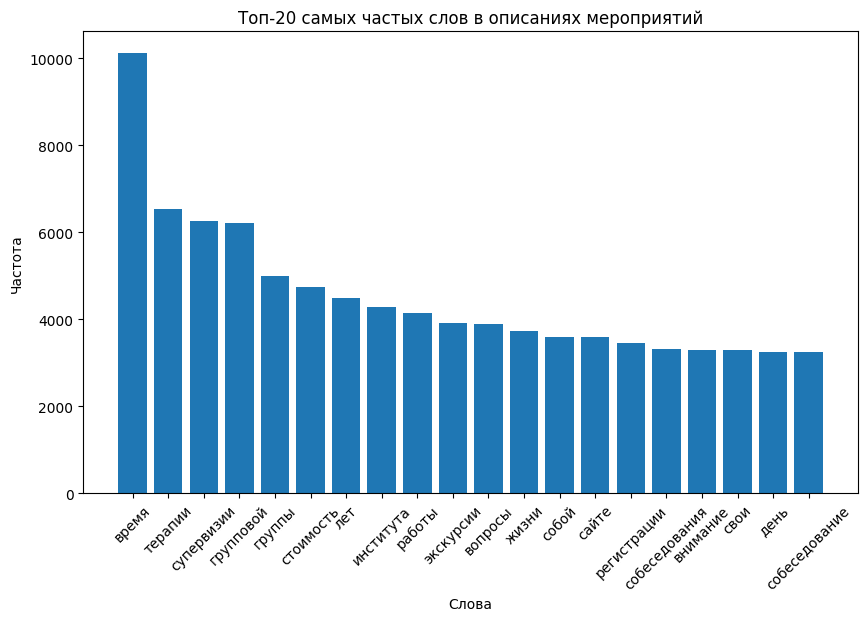

In [ ]:
# Объединение всех описаний в один текст
all_descriptions = ' '.join(data['Полное описание'].dropna())

# Токенизация текста
tokens = word_tokenize(all_descriptions)

# Приведение к нижнему регистру и удаление стоп-слов и неалфавитных символов
stop_words = set(stopwords.words('russian'))
custom_stop_words = {'это', 'которые', 'которая', 'также'}
# Добавление пользовательских стоп-слов к стандартному списку
stop_words.update(custom_stop_words)
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Частотный анализ слов
word_freq = Counter(filtered_tokens)

# Топ-20 самых частых слов
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Визуализация частоты слов
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Топ-20 самых частых слов в описаниях мероприятий')
plt.xticks(rotation=45)
plt.show()

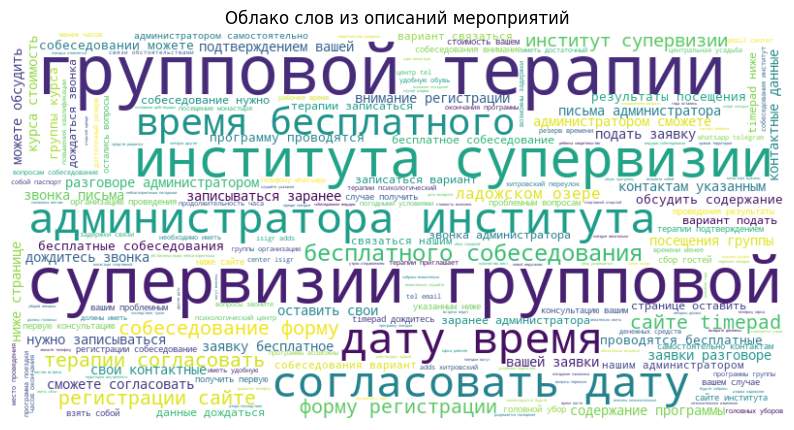

In [ ]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(filtered_tokens))

# Визуализация облака слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из описаний мероприятий')
plt.show()

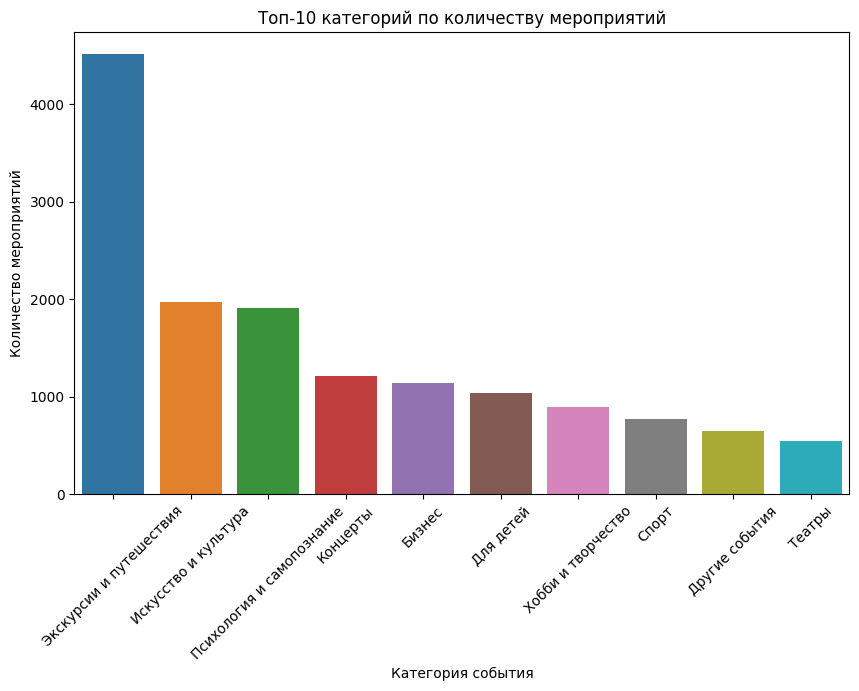

In [ ]:
# Количество мероприятий по категориям
category_counts = data['Категория события'].value_counts()

# Визуализация количества мероприятий в топ-10 категориях
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10])
plt.xticks(rotation=45)
plt.xlabel('Категория события')
plt.ylabel('Количество мероприятий')
plt.title('Топ-10 категорий по количеству мероприятий')
plt.show()

In [ ]:
# Фильтрация онлайн-событий
online_events = data[data['Город'].str.lower() == 'онлайн']

# Подсчет количества онлайн-событий по категориям
online_event_counts = online_events['Категория события'].value_counts()

print(online_event_counts)

Категория события
Психология и самопознание                                        1051
Экскурсии и путешествия                                           395
Бизнес                                                            357
Иностранные языки                                                 212
Хобби и творчество                                                108
Другие события                                                    100
Искусство и культура                                               81
ИТ и интернет                                                      67
Наука                                                              50
Интеллектуальные игры                                              43
Красота и здоровье                                                 32
Концерты                                                           21
Для детей                                                          19
Гражданские проекты                                                14
Вы

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17753 entries, 0 to 17752
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype                    
---  ------                           --------------  -----                    
 0   Название                         17753 non-null  object                   
 1   Место проведения                 17753 non-null  object                   
 2   Стоимость билета                 17753 non-null  object                   
 3   Краткое описание                 16750 non-null  object                   
 4   Полное описание                  17292 non-null  object                   
 5   Максимальное количество человек  17753 non-null  int64                    
 6   Дата проведения                  17753 non-null  datetime64[ns, UTC+03:00]
 7   Возрастные ограничения           17753 non-null  int64                    
 8   Категория события                17753 non-null  object                   
 9   Дата оконча

In [ ]:
data = data.drop('Место проведения', axis=1)

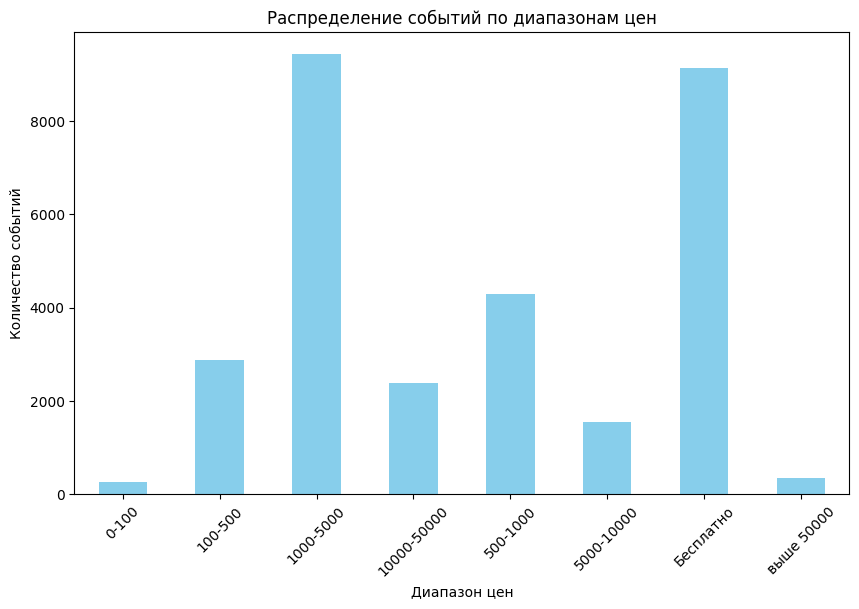

In [ ]:

# Функция для определения диапазона цен
def classify_price(price):
    if price == 0:
        return 'Бесплатно'
    elif 0 < price <= 100:
        return '0-100'
    elif 100 < price <= 500:
        return '100-500'
    elif 500 < price <= 1000:
        return '500-1000'
    elif 1000 < price <= 5000:
        return '1000-5000'
    elif 5000 < price <= 10000:
        return '5000-10000'
    elif 10000 < price <= 50000:
        return '10000-50000'
    else:
        return 'выше 50000'

# Расширение данных с учетом разделенных значений стоимости билетов
expanded_data = []
for index, row in data.iterrows():
    prices = row['Стоимость билета'].split(',')
    for price in prices:
        expanded_data.append({
            'Название': row['Название'],
            'Стоимость билета': float(price),
            'Диапазон цен': classify_price(float(price))
        })

expanded_df = pd.DataFrame(expanded_data)

# Построение гистограммы распределения событий по диапазонам цен
price_ranges = expanded_df['Диапазон цен'].value_counts().sort_index()
price_ranges.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Диапазон цен')
plt.ylabel('Количество событий')
plt.title('Распределение событий по диапазонам цен')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['Категория события'].value_counts()

Категория события
Экскурсии и путешествия                        4514
Искусство и культура                           1971
Психология и самопознание                      1903
Концерты                                       1208
Бизнес                                         1143
                                               ... 
Красота и здоровье, ИТ и интернет                 1
Выставки, Психология и самопознание               1
Экскурсии и путешествия, Другие развлечения       1
Для детей, ИТ и интернет                          1
Бизнес, Другие события                            1
Name: count, Length: 68, dtype: int64

In [ ]:
data = data.drop('Максимальное количество человек', axis = 1)

In [ ]:
data = data.to_csv('events_clean.csv')

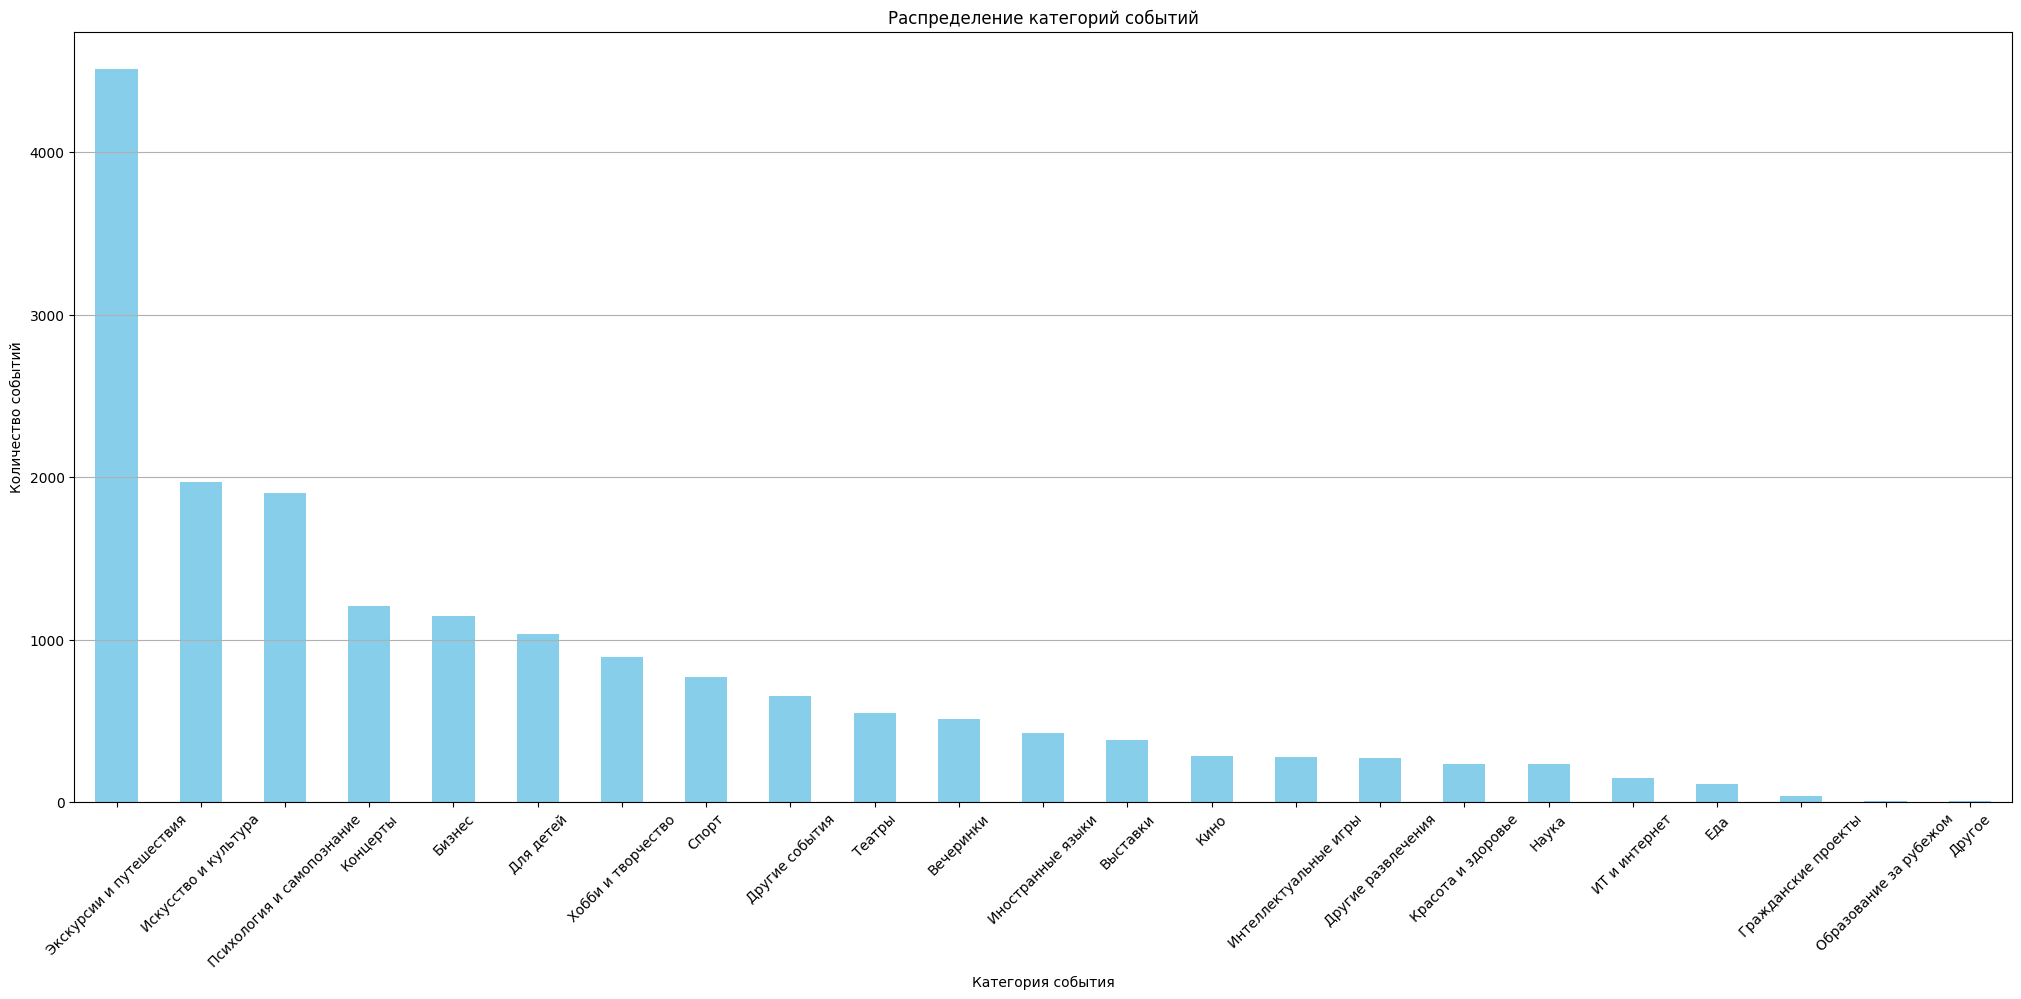

In [ ]:
# Изучим распределение категорий событий
plt.figure(figsize=(25, 10))
data['Категория события'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение категорий событий')
plt.xlabel('Категория события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

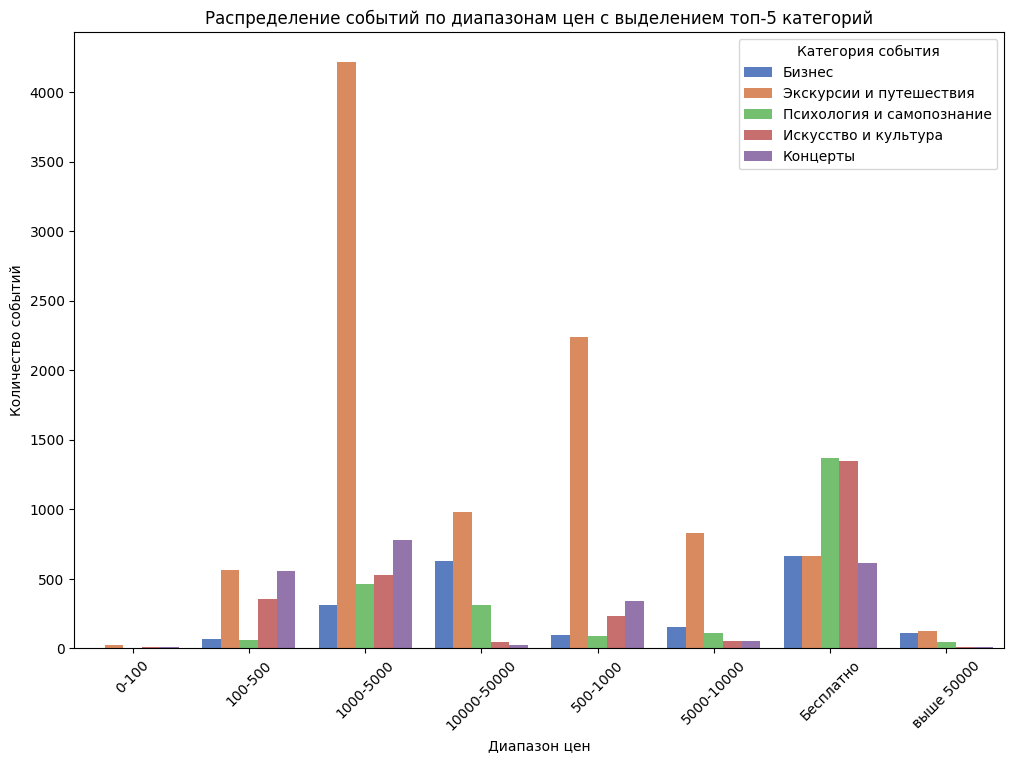

In [ ]:
# Функция для определения диапазона цен
def classify_price(price):
    if price == 0:
        return 'Бесплатно'
    elif 0 < price <= 100:
        return '0-100'
    elif 100 < price <= 500:
        return '100-500'
    elif 500 < price <= 1000:
        return '500-1000'
    elif 1000 < price <= 5000:
        return '1000-5000'
    elif 5000 < price <= 10000:
        return '5000-10000'
    elif 10000 < price <= 50000:
        return '10000-50000'
    else:
        return 'выше 50000'

# Создадим категориальную переменную "Категория события (топ-5)"
top_categories = data['Категория события'].value_counts().nlargest(5).index

# Отфильтруем данные по топ-5 категориям событий
top_category_data = data[data['Категория события'].isin(top_categories)]

# Расширение данных с учетом разделенных значений стоимости билетов
expanded_data = []
for index, row in top_category_data.iterrows():
    prices = row['Стоимость билета'].split(',')
    for price in prices:
        expanded_data.append({
            'Название': row['Название'],
            'Стоимость билета': float(price),
            'Категория события': row['Категория события'],
            'Диапазон цен': classify_price(float(price))
        })

expanded_df = pd.DataFrame(expanded_data)

# Построение гистограммы распределения событий по диапазонам цен с выделением топ-5 категорий
plt.figure(figsize=(12, 8))
sns.countplot(data=expanded_df, x='Диапазон цен', hue='Категория события', order=price_ranges.index, palette='muted')
plt.xlabel('Диапазон цен')
plt.ylabel('Количество событий')
plt.title('Распределение событий по диапазонам цен с выделением топ-5 категорий')
plt.xticks(rotation=45)
plt.legend(title='Категория события')
plt.show()

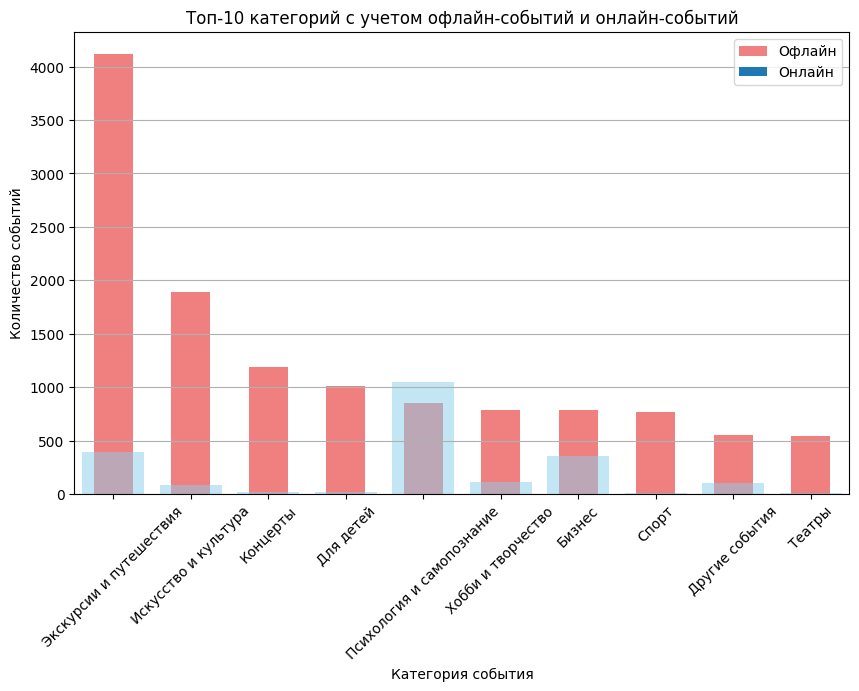

In [ ]:
# Фильтруем данные, чтобы оставить только события, проводимые офлайн
offline_events = data[~data['Город'].str.contains('Онлайн', case=False)]

# Топ-5 категорий среди офлайн-событий
top_categories_offline = offline_events['Категория события'].value_counts().nlargest(10)

# Создаем график
plt.figure(figsize=(10, 6))

# Рисуем столбцы для офлайн-событий
top_categories_offline.plot(kind='bar', color='lightcoral', label='Офлайн')

# Добавляем столбцы для онлайн-событий с прозрачностью
for category in top_categories_offline.index:
    online_count = len(data[(data['Категория события'] == category) & (data['Город'].str.contains('Онлайн', case=False))])
    plt.bar(category, online_count, color='skyblue', alpha=0.5)

# Добавляем пустой столбец для легенды
plt.bar([], [], color='skyblue', label='Онлайн')

plt.title('Топ-10 категорий с учетом офлайн-событий и онлайн-событий')
plt.xlabel('Категория события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

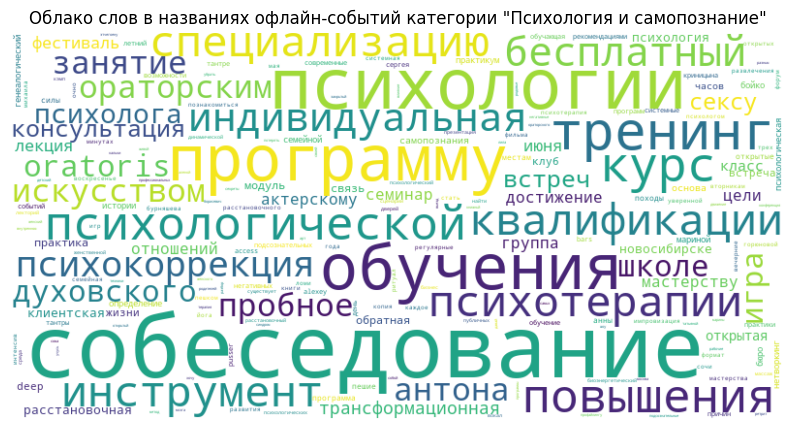

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Название'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в названиях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

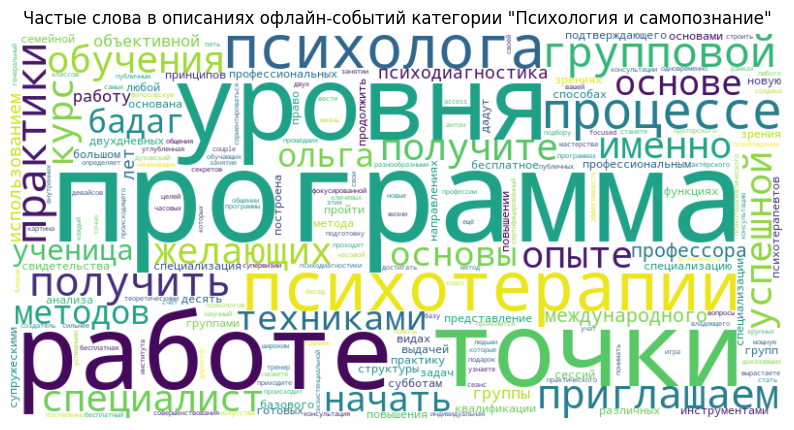

In [ ]:
# Получаем описания офлайн-событий из категории "Психология и самопознание"
offline_psychology_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Краткое описание'].dropna()

# Создаем строку, содержащую все описания офлайн-событий
all_descriptions_offline = ' '.join(offline_psychology_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в описаниях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

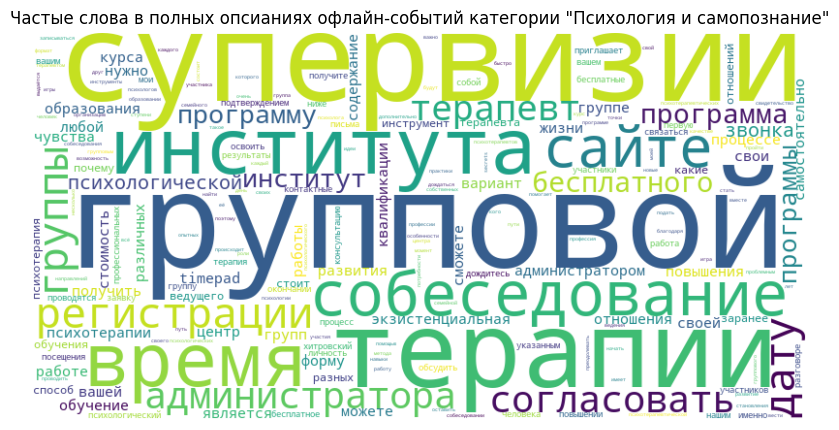

In [ ]:
# Получаем описания офлайн-событий из категории "Психология и самопознание"
offline_psychology_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Полное описание'].dropna()

# Создаем строку, содержащую все описания офлайн-событий
all_descriptions_offline = ' '.join(offline_psychology_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.update(['это','которые','которые'])

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в полных опсианиях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

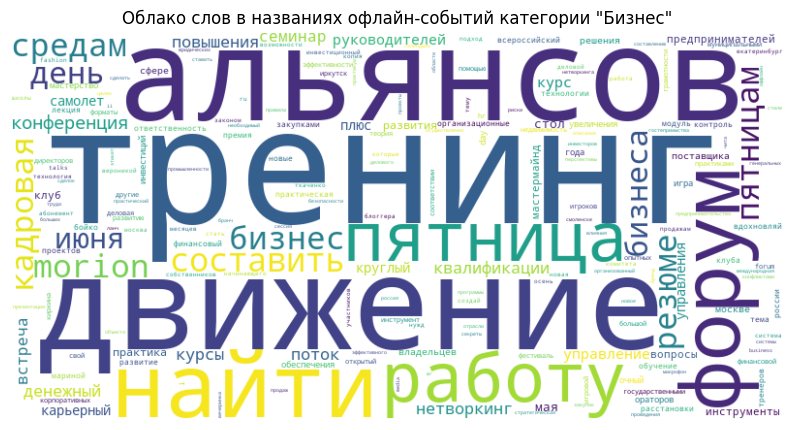

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Название'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в названиях офлайн-событий категории "Бизнес"')
plt.axis('off')
plt.show()

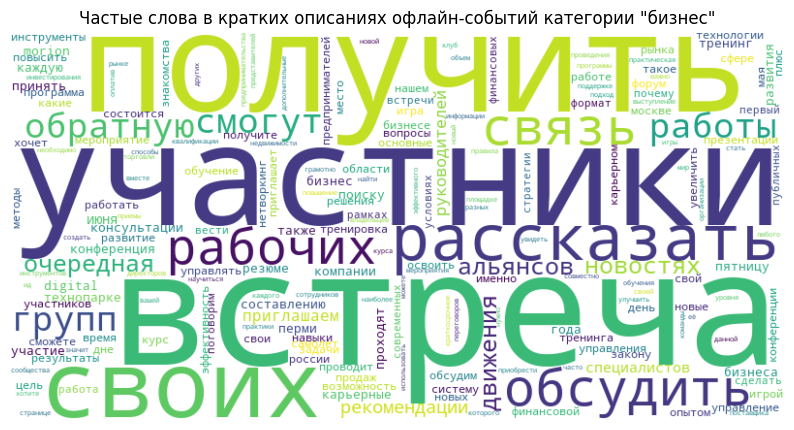

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем описания событий из категории "бизнес", проводимых офлайн
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Краткое описание'].dropna()

# Создаем строку, содержащую все описания событий
all_descriptions_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.update(['это', 'которые', 'пройдет'])
# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в кратких описаниях офлайн-событий категории "бизнес"')
plt.axis('off')
plt.show()

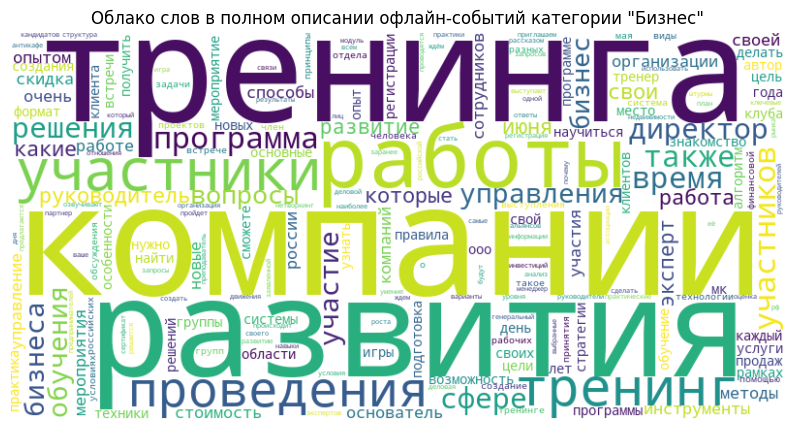

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Полное описание'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в полном описании офлайн-событий категории "Бизнес"')
plt.axis('off')
plt.show()